In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
dataPath='input_files/newsgroups/'

In [172]:
training_table = pd.read_table(dataPath+'trainMatrixModified.txt',delimiter='\t',header=None)
train_label_table = pd.read_table(dataPath+'trainClasses.txt',index_col=0,header=None)

test_table = pd.read_table(dataPath+'testMatrixModified.txt',delimiter='\t',header=None)
test_label_table = pd.read_table(dataPath+'testClasses.txt', index_col=0,header=None)

DF_training_table = np.array(training_table.T)
DF_test_table = np.array(test_table.T)
train_label = np.array(train_label_table).flatten()
test_label = np.array(test_label_table).flatten()

In [173]:
terms = pd.read_table(dataPath+'modifiedterms.txt', index_col=0,header=None)

In [175]:
DF_training_table[:4]

array([[2., 2., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]])

In [176]:
print('training_table.shape = ',training_table.shape)
print('train_label_table.shape = ',train_label_table.shape)

print('test_table.shape = ',test_table.shape)
print('test_label_table.shape = ',test_label_table.shape)

print('terms.shape = ',terms.shape)

print(DF_test_table[0])

training_table.shape =  (5500, 800)
train_label_table.shape =  (800, 1)
test_table.shape =  (5500, 200)
test_label_table.shape =  (200, 1)
terms.shape =  (5500, 0)
[0. 0. 0. ... 0. 0. 0.]


In [177]:
print('terms\n',terms.head())
print()
print('train_label_table\n')
train_label_table[:4]

terms
 Empty DataFrame
Columns: []
Index: [david, rex, wood, subject, call]

train_label_table



,1
0,
0,0
1,1
2,0
3,1


In [178]:
termFreqs = training_table.sum(axis=1).astype(np.int64)
termFreqs.head()

0    102
1     11
2     22
3    959
4    222
dtype: int64

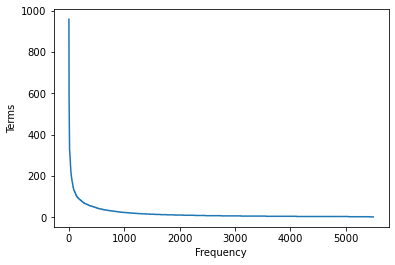

In [179]:
plt.plot(sorted(termFreqs, reverse=True))
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()

#### indicates most the word are non repetetive


#### 1.a Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples).

In [180]:
def calculateEuclideanDistance(x,D):
    dist = np.sqrt((D -x)**2).sum(axis=1)
    return dist


def calculateCosineSimilarityDistance(x,D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    return dist
    

In [181]:
def knn_search(x,D,K,measure):
    if(measure==0):
        distance = calculateEuclideanDistance(x,D)
    else:
        distance = calculateCosineSimilarityDistance(x,D)
    
    #sort the distances    
    idx = np.argsort(distance)
    neigh_distances = idx[:K]
    return neigh_distances,distance

In [182]:
def knn_classify(x,D,training_lable,K,measure):
    neigh_distances,distance = knn_search(x,D,K,measure)
    neigh_labels = training_lable[neigh_distances]
    
    # get the predicted class from the K neighbors
    from collections import Counter
    count = Counter(neigh_labels)
    #print(count)
    predicted_class = count.most_common(1)[0][0]
    
    #print("neigh_distances ", neigh_distances,"K=",K,"\nneigh_labels\n",neigh_labels)
    return predicted_class,neigh_labels,neigh_distances

In [183]:
%%time
K=5
predicted_class,neigh_labels,distance = knn_classify(DF_test_table[1],DF_training_table,train_label,K,0)
print("********************** Using Euclidean distance **********************")
print("The Top \"{}\" neighbors are {}\nThe predicted class = {}  ({})".format(K,distance,predicted_class,('Windows' if (predicted_class == 0) else 'Hockey')))
print()
predicted_class,neigh_labels,distance = knn_classify(DF_test_table[1],DF_training_table,train_label,K,1)
print("********************** Using Cosine distance **********************")
print("The Top \"{}\" neighbors are {}\nThe predicted class = {}  ({})".format(K,distance,predicted_class,('Windows' if (predicted_class == 0) else 'Hockey')))
print()

#test_table[10]

********************** Using Euclidean distance **********************
The Top "5" neighbors are [798 757 224  38 342]
The predicted class = 0  (Windows)

********************** Using Cosine distance **********************
The Top "5" neighbors are [382 775 163 587 550]
The predicted class = 0  (Windows)

Wall time: 97 ms


#### 1.b Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances)

In [184]:
def knn_evaluate(DT_test, test_labels, DT_train, train_labels, K, measure):
    success =  0
    for i in range(len(DT_test)):
        predicted_class,neigh_labels,distance = knn_classify(DT_test[i], DT_train, train_labels, K, measure)
        if(predicted_class == test_labels[i]):
            success +=1
        
    accurary = (success/len(DT_test)) * 100
    return len(DT_test),success,accurary

In [185]:
%%time
K=5
measure=0
total_data_count,success_count,measured_accuracy = knn_evaluate(DF_test_table,test_label,DF_training_table,train_label,K,measure)
print('Total Test Data count = ',total_data_count,'\n# of successes = ',success_count,'\n# of Nearest Neighors (K) = ',K,'\nMeasured accuracy with Euclidean distance for ',K,' nearest neighbors = ',measured_accuracy," % ")

print("\n")

measure=1
total_data_count,success_count,measured_accuracy = knn_evaluate(DF_test_table,test_label,DF_training_table,train_label,K,measure)
print('Total Test Data count = ',total_data_count,'\n# of successes = ',success_count,'\n# of Nearest Neighors (K) = ',K,'\nMeasured accuracy with Cosine distance for ',K,' nearest neighbors = ',measured_accuracy," % ")

print("\n")

Total Test Data count =  200 
# of successes =  131 
# of Nearest Neighors (K) =  5 
Measured accuracy with Euclidean distance for  5  nearest neighbors =  65.5  % 


Total Test Data count =  200 
# of successes =  194 
# of Nearest Neighors (K) =  5 
Measured accuracy with Cosine distance for  5  nearest neighbors =  97.0  % 


Wall time: 16.1 s


#### 1.c Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Eculidean distance version vs. cosine similarity version).

In [186]:
euclid_accuracy = []
cosine_accuracy = []

In [187]:
%%time
for K in range(5,100,5):
    total_data_count,success_count,measured_accuracy = knn_evaluate(DF_test_table,test_label,DF_training_table,train_label,K,0)
    euclid_accuracy.append(measured_accuracy)

Wall time: 4min 34s


In [188]:
%%time
for K in range(5,100,5):
    total_data_count,success_count,measured_accuracy = knn_evaluate(DF_test_table,test_label,DF_training_table,train_label,K,1)
    cosine_accuracy.append(measured_accuracy)

Wall time: 40.1 s


In [189]:
print(" euclid_accuracy ",euclid_accuracy)
print(" cosine_accuracy ",cosine_accuracy)

 euclid_accuracy  [65.5, 69.0, 61.5, 65.0, 56.49999999999999, 55.50000000000001, 54.50000000000001, 55.00000000000001, 52.5, 53.0, 52.5, 53.0, 52.0, 54.0, 52.5, 53.0, 54.0, 53.5, 53.5]
 cosine_accuracy  [97.0, 98.5, 98.5, 97.5, 97.0, 98.0, 98.0, 98.0, 97.5, 98.0, 97.5, 98.0, 97.5, 97.5, 97.5, 97.5, 97.5, 97.5, 97.5]


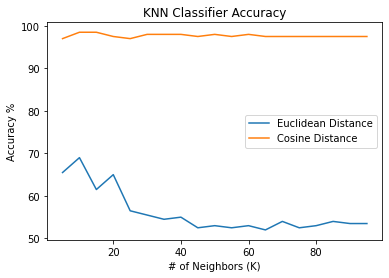

In [190]:
K_values= range(5,100,5)

plt.plot(K_values,euclid_accuracy,label = "Euclidean Distance")
plt.plot(K_values,cosine_accuracy,label = "Cosine Distance")
plt.xlabel('# of Neighbors (K)')
plt.ylabel('Accuracy %')
plt.title('KNN Classifier Accuracy')
plt.legend(loc=7)
plt.show()

#### 1.d Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similairty version of the classifier) on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [191]:
print("training_table shape ",training_table.shape, " training_table shape ",test_table.shape)


training_table shape  (5500, 800)  training_table shape  (5500, 200)


In [192]:
# Find document frequencies 
train_DF = np.array([(training_table !=0).sum(1)]).T
test_DF = np.array([(test_table !=0).sum(1)]).T

NDocs = DF_training_table.shape[0]
NTerms = DF_training_table.shape[1]
print(" train_DF[0] ",train_DF[0], " test_DF[0] ",test_DF[0], "\n # of Train Docs ",NDocs,"\n # of terms ",NTerms)


 train_DF[0]  [50]  test_DF[0]  [15] 
 # of Train Docs  800 
 # of terms  5500


In [193]:

# Create a matrix with all entries and multiple by NDocs
NMatrix = np.ones(np.shape(training_table), dtype=float) * NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print("np.shape(training_table )= ",np.shape(training_table ),"\ntrain_DF[:3] : \n",train_DF[:3])
print()
print(NMatrix)

print()


np.shape(training_table )=  (5500, 800) 
train_DF[:3] : 
 [[50]
 [ 7]
 [10]]

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]



In [194]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.
IDF = np.log2(np.divide(NMatrix,train_DF))
IDF.shape

(5500, 800)

In [195]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = training_table * IDF
pd.set_option("display.precision", 2)

TD_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89


In [196]:
# The KNN Search function expects a document x term materix as an np array, so we need to transpose the TF_tfidf matrix
DT_tfidf = TD_tfidf.T
DT_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,8.0,13.67,12.64,0.0,23.11,27.86,7.89,32.71,9.78,8.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,8.18,0.00,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
DT_array = np.array(DT_tfidf)
DT_array[:3]

array([[ 8.  , 13.67, 12.64, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [198]:
# Compute the TF x iDF values for each document term
test_TD_tfidf = test_table  * IDF[:,:200]
pd.set_option("display.precision", 2)
print(test_TD_tfidf.head(3))

# The KNN Search function expects a document x term materix as an np array, so we need to transpose the TF_tfidf matrix
test_DT_tfidf = test_TD_tfidf.T
test_DT_array = np.array(test_DT_tfidf)
test_DT_array[:3]


   0    1    2    3    4    5    6    7    8    9    ...  190  191  192  193  \
0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   194  195  196  197  198  199  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 200 columns]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

In [199]:
%%time
cosine_accuracy_DT =[]
best_KNN_result = {}
best_accuracy=0
for K in range(5,100,5):
    total_data_count,success_count,measured_accuracy = knn_evaluate(test_DT_array,test_label,DT_array,train_label,K,1)
    if(best_accuracy<measured_accuracy):
        best_accuracy = measured_accuracy
        best_KNN_result['K']=K
        best_KNN_result['best_accuracy']=best_accuracy
        
    cosine_accuracy_DT.append(measured_accuracy)
    
best_KNN_result

Wall time: 3min 49s


{'K': 20, 'best_accuracy': 100.0}

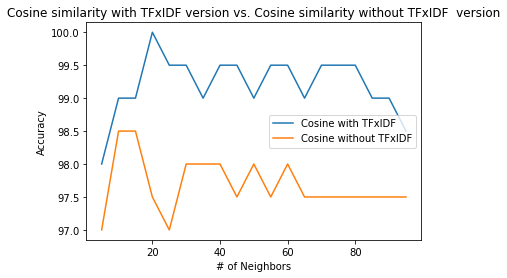

In [200]:

plt.plot(K_values,cosine_accuracy_DT,label = "Cosine with TFxIDF")
plt.plot(K_values,cosine_accuracy,label = "Cosine without TFxIDF")
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.title('Cosine similarity with TFxIDF version vs. Cosine similarity without TFxIDF  version')
plt.legend(loc=7)
plt.show()

#### 1.e Create a new classifier based on the Rocchio Method adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classifiation function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario.]

In [201]:
#The training part for the classifier takes as input the training data matrix and the training labels, 
##  returning the prototype vectors for each class
def Rocchio_Train(df,L):
    D = df.copy()
    D['class']=L
    return D.groupby('class').sum()

In [202]:
DF_training_table = training_table.T
print(DF_training_table.shape)
print(train_label.shape)
print(DT_tfidf.shape)

(800, 5500)
(800,)
(800, 5500)


In [203]:
train_label[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [204]:
DT_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
0,8.0,13.67,12.64,0.0,23.11,27.86,7.89,32.71,9.78,8.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,2.89,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,8.18,0.00,2.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
%%time
prototypes = Rocchio_Train(DT_tfidf,train_label)
np.unique(train_label)

Wall time: 99 ms


array([0, 1], dtype=int64)

In [206]:
prototypes

,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
class,,,,,,,,,,,,,,,,,,,,,
0,228.0,27.35,31.61,0.0,453.57,390.08,390.40,1071.39,264.00,252.91,...,0.00,0.00,9.64,17.29,24.18,16.12,24.18,8.64,17.29,17.29
1,180.0,47.86,107.47,0.0,187.78,0.00,35.49,0.00,4.89,385.39,...,25.93,17.29,0.00,0.00,0.00,8.06,0.00,8.64,0.00,0.00


In [207]:
def roch_calculateCosineSimilarityDistance(x,D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    ##print('test norm',x_norm,'\nD_norm',D_norm)
    sims = np.dot(D,x)/(D_norm * x_norm)
    ##print('sims ',sims)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    return distance, sims

## get category label
def getPrototypeCategory(num):
    return 'Hockey' if(num==1) else 'Windows'
    

"""
The classification function  would take as input the prototypes and the instance to be classified. 
  This function should measure Cosine similarity of the test instance to each prototype vector. 
 Your output should indicate 
              the predicted class for the test instance and 
              the similarity values of the instance to each of the category prototypes

""" 
def Rocchio_classifier(prototypes, instance):
    distance,similarity_measures = roch_calculateCosineSimilarityDistance(instance,prototypes)
    max_similarity_measure_dict = {}
    max_similarity = -2
    total_similarity = 0
    instance_proto_cat_similarity = {}
    for i in range(len(similarity_measures)):
        total_similarity +=np.round(similarity_measures[i],2)
        instance_proto_cat_similarity[str(i)+" ("+getPrototypeCategory(i)+")"]=np.round(distance[i],2)
        if(max_similarity < similarity_measures[i]):
            max_similarity=similarity_measures[i]
            max_similarity_measure_dict[max_similarity]=i
            
    return np.round(total_similarity,2),np.round(max_similarity,2),max_similarity_measure_dict[max_similarity],instance_proto_cat_similarity
        
    

In [208]:
%%time

# DF_training_table = training_table.T
# DF_training_table = np.array(DF_training_table)

prototypes_arr = np.array(prototypes)
total_distance,max_distance,predicted_class,similarity_values = Rocchio_classifier(prototypes_arr,DT_array[0])
print(" Similarity values", similarity_values)
print(" total distance = {} \n max Distance= {}".format(total_distance, max_distance ))
print(" Predicted class {} ({})".format(predicted_class, getPrototypeCategory(predicted_class)))
print()

 Similarity values {'0 (Windows)': 382, '1 (Hockey)': 775}
 total distance = 0.3 
 max Distance= 0.24
 Predicted class 0 (Windows)

Wall time: 1.98 ms


In [209]:
def rocchio_evaluate(test, test_lab, prototype):
    success =  0
    for i in range(len(test)):
        total_similarity,max_similarity,predicted_class,similarity_values = Rocchio_classifier(prototype,test[i])
        if(predicted_class == test_lab[i]):
            success +=1
    accurary = (success/len(test)) * 100
    return len(test),success,accurary

In [210]:
%%time
total_data_count,success_count,measured_accuracy = rocchio_evaluate(test_DT_array,test_label,prototypes_arr)
print('Total Test Data count = ',total_data_count,'\n# of successes = ',success_count,'\nMeasured accuracy = ',measured_accuracy," % ")

print("\n")

print('best_KNN_result ',best_KNN_result)

Total Test Data count =  200 
# of successes =  196 
Measured accuracy =  98.0  % 


best_KNN_result  {'K': 20, 'best_accuracy': 100.0}
Wall time: 58 ms


In [211]:
%%time
total_data_count,success_count,measured_accuracy = rocchio_evaluate(DT_array,train_label,prototypes_arr)
print('Total Train Data count = ',total_data_count,'\n# of successes = ',success_count,'\nMeasured accuracy = ',measured_accuracy," % ")

print("\n")


Total Train Data count =  800 
# of successes =  793 
Measured accuracy =  99.125  % 


Wall time: 234 ms
